## Documentation

1. Regaring team_members, an average startup has a team of 16 members while the minimum is only the founder and maximum exceeds a team of 500 members.

2. Plotted a pie chart to diffrenciate percentages of various **launch_stages**

3. Plotted a bar plot to identify **activity level** of startups

4. Tried to draw correlation between **page_views** and **twitter_followers** but couldn't find any meaningful insights.

5. Bar plot between **amount_raised** and **pageviews**

6. **amount_raised** vs **team members**

7. Correlation heatmap to identify correlations between numerical features

8. **Startup count** vs **Cities**

9. **twitter_followers** per **startup**

10. **twitter_followers** vs **team_members**

11. Market Analysis using WordCloud

12. Product Analysis using WordCloud

13. Plotted some of the above plots interactively using Plotly




In [136]:
#Importing all the necessary libraries at the beginning

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [137]:
#Reading the dataset
df = pd.read_csv('data14(1).csv')


In [138]:
#Displaying the first 10 rows of the dataset for an overview

df.head(10)

,Unnamed: 0,market,products,launch_stage,activity_level,activity_verified,pageviews,team_member,founded_by,revenue_stage,revenue_through,twitter_followers,amount_raised,company_website,description,name,founded,place,crunchbase_link,ranking
0,0,"'marketing', 'productivity', 'social networks'...","'desktop app', 'mobile app', 'service', 'web app'",Publicly,Low company activity detected,21 Jan 21,72600.0,30.5,'SocialMeep',Post,"'b2c', 'b2b', 'freemium', 'subscription'",184,Undisclosed,https://socialmeep.com?ref=startuptracker,'SocialMeep builds automatic growth and market...,'SocialMeep',March 3 2018,New York US,https://www.crunchbase.com/organization/social...,66100
1,1,"'design', 'education', 'software dev'",'web app',Publicly,High company activity detected,15 Jan 21,18900.0,4.0,'DesignerUp',Pre,"'b2c', 'free to use', 'sales'",590,Undisclosed,http://DesignerUp.co?ref=startuptracker,'An ecosystem of UI/UX and product design reso...,'DesignerUp',October 21 2018,San Francisco US,https://angel.co/company,252000
2,2,"'advertising', 'marketing', 'startups', 'content'",'web app',Publicly,High company activity detected,14 Jan 21,1700.0,4.0,"'strategynode', 'Tyler J. Fox'",Pre,"'b2c', 'b2b', 'free to use'",7,Undisclosed,https://katang.io/?t_pid=2?ref=startuptracker,'KaTang is an end-to-end content marketing pla...,'KaTang',November 1 2019,Lehi US,https://www.crunchbase.com/organization/katang,2700000
3,3,"'advertising', 'e commerce', 'media', 'content'","'mobile app', 'web app'",Publicly,High company activity detected,30 Dec 20,5000.0,7.5,"'Rad Padre', 'Freedom TV+'",Pre,"'b2c', 'free to use', 'commission', 'affiliation'",11,Undisclosed,https://www.freedomrains.com/?ac=218B21?ref=st...,'Shopping assistant browser extension that pro...,"'Above & Beyond Studios, Inc.'",June 26 2019,Boston US,https://producthunt.com/posts/freedom-super-sa...,945700
4,4,"'security', 'blockchain'",'mobile app',Publicly,No recent company activity detected,29 Dec 20,957.0,7.5,'VyrocApp',Post,"'b2c', 'free to use', 'advertising', 'subscrip...",17,Undisclosed,http://vyrocapp.com?ref=startuptracker,"'Private Search Engine, Powered by the Blockch...",'Vyroc',January 1 2020,New York US,https://www.crunchbase.com/organization/vyroc,4800000
5,5,"'communication', 'marketing', 'startups', 'sales'","'service', 'web app'",Privately,High company activity detected,5 Dec 20,2800.0,30.5,'Chris Beaman',Post,"'b2b', 'freemium', 'sales', 'subscription'",29,Self,https://www.astronomic.com?ref=startuptracker,'We connect founders and help them grow','Astronomic',June 1 2020,Austin US,https://startuptracker.io,1700000
6,6,"'data', 'productivity', 'startups', 'content'","'other', 'desktop app', 'mobile app', 'web app'",Pre,High company activity detected,3 Dec 20,2100.0,7.5,'Snipply',Pre,"'b2c', 'b2b', 'freemium', 'subscription'",110,Undisclosed,http://www.snipply.io?ref=startuptracker,'Snipply connects the content inside the apps ...,'Snipply',June 1 2019,New York US,https://startuptracker.io,2200000
7,7,"'analytics', 'manufacturing', 'productivity', ...","'desktop app', 'web app'",Privately,High company activity detected,25 Nov 20,8300.0,30.5,'Angshuman Guha',Pre,"'b2b', 'affiliation', 'freemium', 'sales'",92,Undisclosed,https://bipp.io/?ref=startuptracker,"'bipp is an enterprise-grade, cloud business i...",'bipp Analytics',July 15 2017,Plano US,https://www.crunchbase.com/organization/bipp-a...,566200
8,8,"'productivity', 'accounting and legal', 'ai', ...","'desktop app', 'mobile app', 'web app'",Privately,High company activity detected,23 Nov 20,0.0,4.0,'agreemint',Pre,"'b2c', 'b2b', 'freemium', 'sales', 'subscription'",31,Undisclosed,https://www.agreemint.com?ref=startuptracker,'Through the Agreemint Contract AI users engag...,'Agreemint',February 10 2018,San francisco US,https://www.crunchbase.com/organization/agreemint,0
9,9,'software dev',"'mobile app', 'web app'",Publicly,High company activity detected,11 Nov 20,4600.0,7.5,'Shake SDK',Pre,"'b2b', 'freemium'",16,Undisclosed,ht

In [139]:
#Checking for any null values or missing values in the dataset
df.isnull().sum()

Unnamed: 0            0
market                0
products              0
launch_stage          0
activity_level        0
activity_verified     0
pageviews             0
team_member           0
founded_by           92
revenue_stage         0
revenue_through       0
twitter_followers     0
amount_raised         0
company_website       0
description           0
name                  0
founded               0
place                 0
crunchbase_link       0
ranking               0
dtype: int64

The column of **founded_by** has some null values but textual data like the founder's name wouldn't impact the success rate of startup so we can ignore the column for analysis

In [140]:
#Checking for any duplicated entries before proceeding further.
df.duplicated().sum()

0

## Proceeding with Exploratory Data Analysis


In [141]:
#Finding the shape of the dataset
df.shape

(638, 20)

In [142]:
df.describe()

,Unnamed: 0,pageviews,team_member,twitter_followers,ranking
count,638.000000,6.380000e+02,638.000000,6.380000e+02,6.380000e+02
mean,318.500000,2.170874e+05,16.638715,1.594725e+05,1.417138e+06
std,184.319017,4.511363e+06,48.650428,9.000172e+05,2.147494e+06
min,0.000000,0.000000e+00,1.000000,1.000000e+00,0.000000e+00
25%,159.250000,6.250000e+00,2.000000,3.400000e+01,0.000000e+00
50%,318.500000,1.300000e+03,7.500000,4.155000e+02,2.598000e+05
75%,477.750000,6.575000e+03,30.500000,1.200000e+03,2.200000e+06
max,637.000000,1.131000e+08,750.500000,9.200000e+06,9.800000e+06


Direct Inferences which can be obtained from this particular describe function are as follows:-

Regaring **team_members**, an average startup has a team of 16 members while the minimum is only the founder and maximum exceeds a team of 500 members.



## Now, lets dive deeper into the analysis of each column to see what we can expect

In [143]:
#Now, lets take the launch_stage column

df['launch_stage']

0         Publicly
1         Publicly
2         Publicly
3         Publicly
4         Publicly
          ...     
633       Publicly
634       Publicly
635           Self
636           $20k
637    Undisclosed
Name: launch_stage, Length: 638, dtype: object

In [144]:
#Let us look at the count of each type of these

df['launch_stage'].value_counts()

Publicly       453
Privately      109
Pre             73
Undisclosed      1
Self             1
$20k             1
Name: launch_stage, dtype: int64

([<matplotlib.patches.Wedge at 0x7f63e4ea02d0>,
 [Text(-0.674283306413011, 0.8691041495084105, 'Publicly'),
  Text(0.3099056732825357, -1.0554423118613818, 'Privately'),
  Text(1.0178151035537473, -0.41719589520736544, 'Pre'),
  Text(1.09966661629779, -0.027080121864006303, 'Self'),
  Text(1.0998799770218488, -0.01624918910031017, '$20k'),
  Text(1.0999866633617659, -0.005416680371712149, 'Undisclosed')])

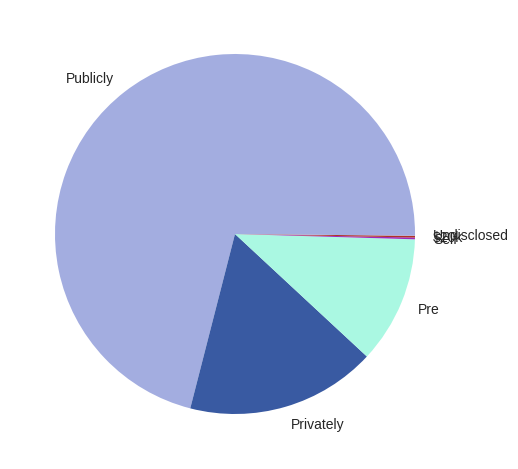

In [145]:
import random

fig_6 = plt.figure(figsize=(8,5),dpi=100)
axes_6 = fig_6.add_axes([0.1,0.1,0.9,0.9])

# Create a pie chart of the types of launch_stages

types = df['launch_stage'].unique()





colors = []

for i in range(5):
    colors.append((random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)))

plt.pie(list(df['launch_stage'].value_counts()),colors=colors,labels=df['launch_stage'].unique())

As we can see, almost 99% of the startups are split between public, private and Pre with Public dominating followed by Private

In [146]:
df['activity_level']

0            Low company activity detected
1           High company activity detected
2           High company activity detected
3           High company activity detected
4      No recent company activity detected
                      ...                 
633             Sourced by Startup Tracker
634         High company activity detected
635    No recent company activity detected
636             Sourced by Startup Tracker
637             Sourced by Startup Tracker
Name: activity_level, Length: 638, dtype: object

In [147]:
df['activity_level'].value_counts()

High company activity detected         301
No recent company activity detected    232
Low company activity detected           65
Sourced by Startup Tracker              40
Name: activity_level, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Activity Level of Startups')

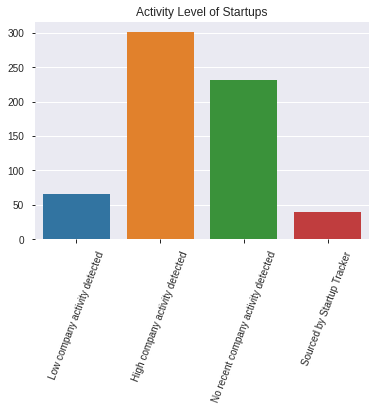

In [148]:
d = {}
for i in df['activity_level'].unique():
    
    d[i] = len(df.loc[df['activity_level']==i])
sns.barplot([i for i in d.keys()],[i for i in d.values()])
plt.xticks(rotation=69)
plt.title('Activity Level of Startups')

In [149]:
df['pageviews']

0        72600.0
1        18900.0
2         1700.0
3         5000.0
4          957.0
         ...    
633          0.0
634    1200000.0
635       1200.0
636       3700.0
637       7400.0
Name: pageviews, Length: 638, dtype: float64

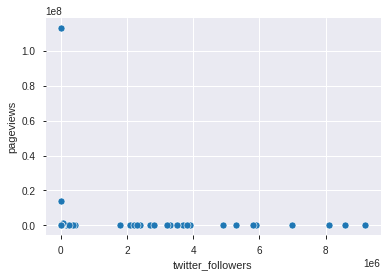

In [150]:
sns.scatterplot(x = df['twitter_followers'],y=df['pageviews'])

The columns of **page_views** and **twitter_followers** are not at all correlated so there's no insight to draw from this

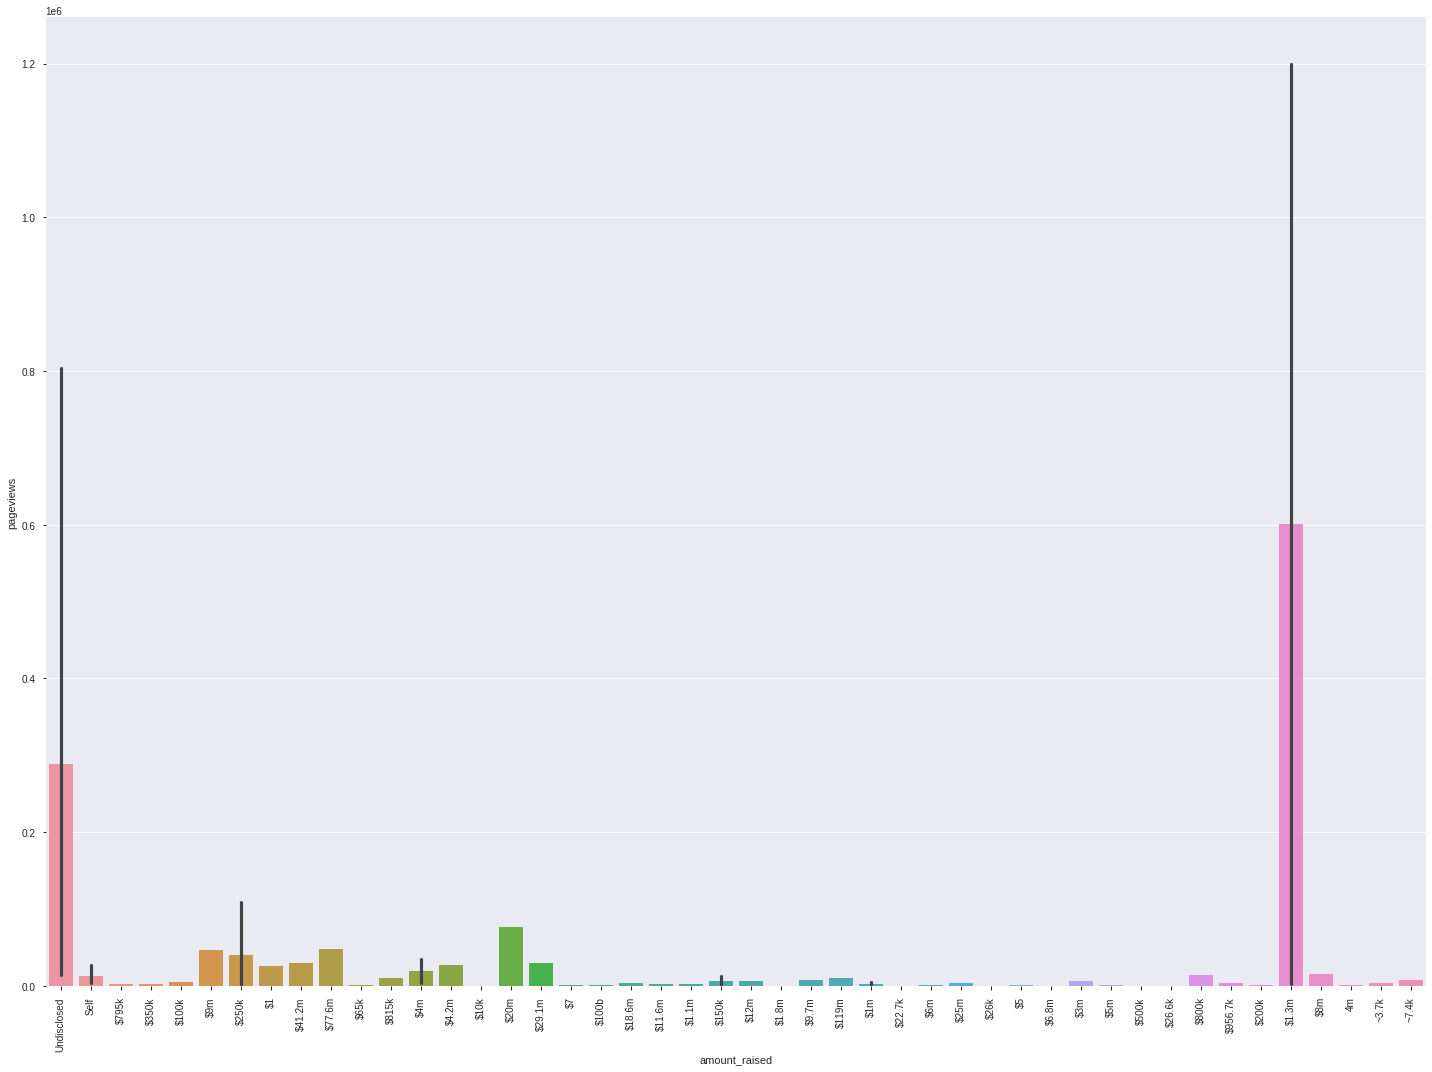

In [151]:
plt.figure(figsize=(20,15))
sns.barplot(y = df['pageviews'],x=df['amount_raised'])
plt.xticks(rotation=90)
plt.tight_layout()

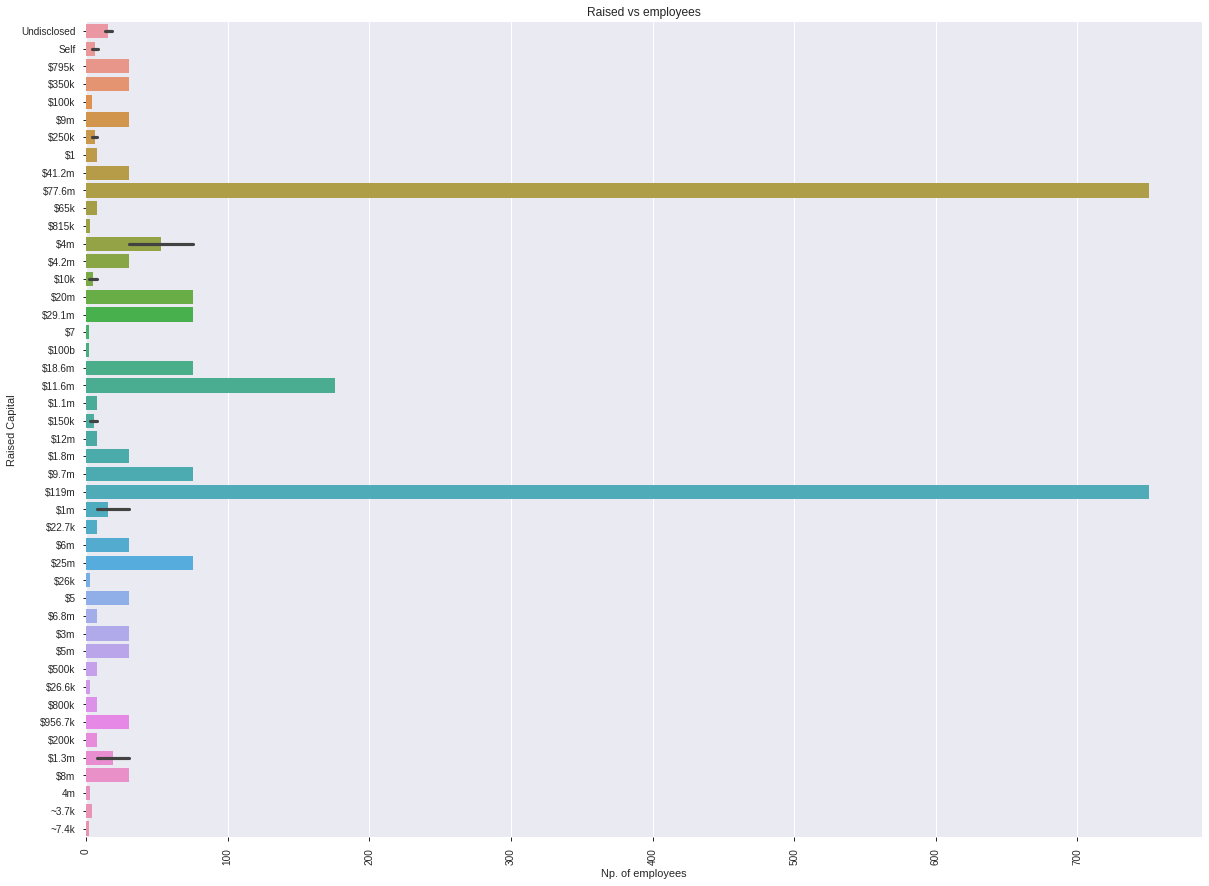

In [152]:
plt.figure(figsize=(20,15))
ax=sns.barplot(x=df.team_member,y=df.amount_raised)
plt.xticks(rotation=90)
plt.xlabel("Np. of employees")
plt.ylabel("Raised Capital")
plt.title("Raised vs employees")
plt.show()

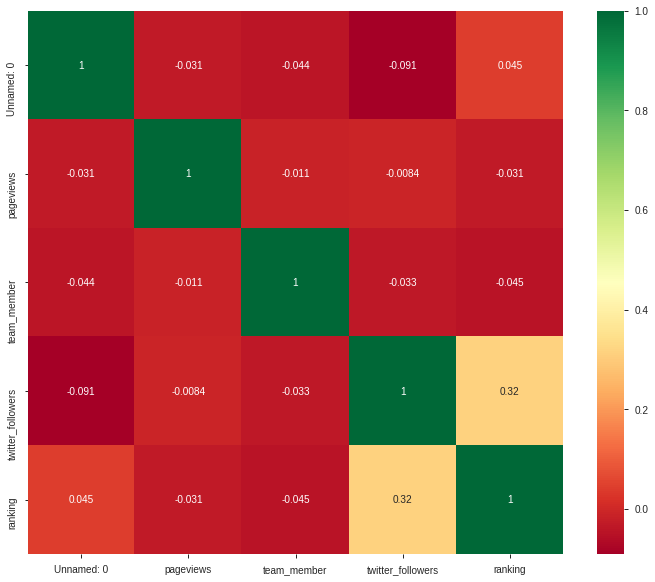

In [153]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [154]:
df['place'].value_counts()[:10]

London UK           196
New York US          35
San Francisco US     32
Lagos Nigeria        23
Los Angeles US       11
Edinburgh UK         11
Manchester UK        10
Bristol UK            8
Seattle US            7
Boston US             7
Name: place, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Startups by City')

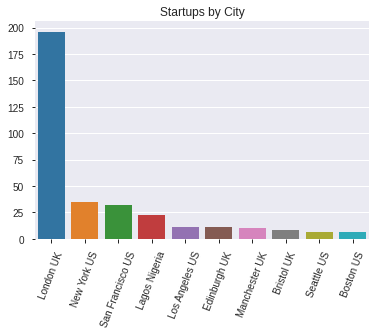

In [155]:
sns.barplot(df['place'].value_counts().nlargest(10).index,list(df['place'].value_counts().nlargest(10)))
plt.xticks(rotation=69)
plt.title('Startups by City')

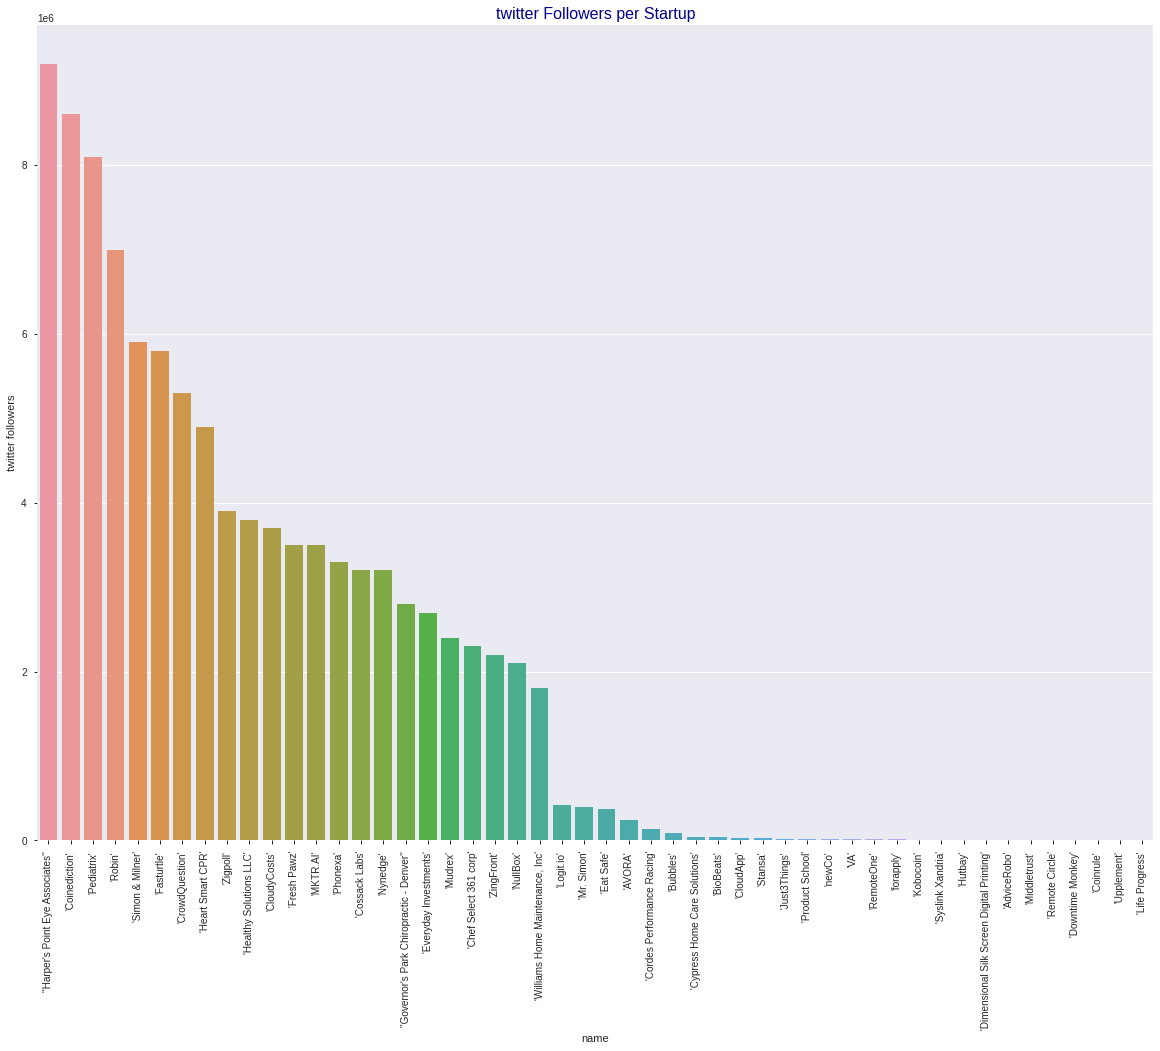

In [156]:
df2 = pd.DataFrame(columns = ['name'])
df2["name"]=[each for each in df['name'].unique()]
df2["amount"]=df['twitter_followers']
df2=df2.sort_values(by=['amount'],ascending=False)

plt.figure(figsize=(20,15))
sns.barplot(x=df2.name.head(50), y=df2.amount.head(50))
plt.xticks(rotation= 90)
plt.xlabel('name')
plt.ylabel('twitter followers')
plt.title('twitter Followers per Startup',fontsize=16,color='DarkBlue')
plt.show()

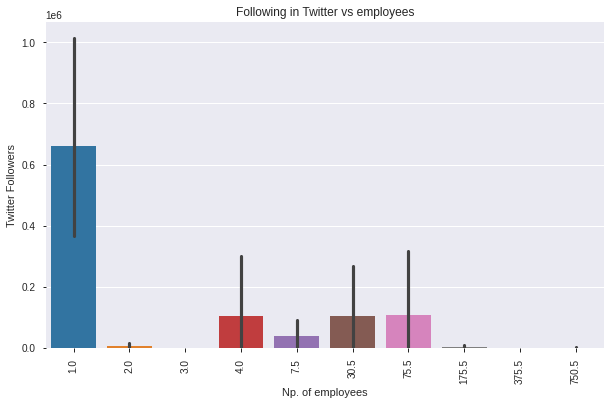

In [157]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=df.team_member,y=df.twitter_followers)
plt.xticks(rotation=90)
plt.xlabel("Np. of employees")
plt.ylabel("Twitter Followers")
plt.title("Following in Twitter vs employees")
plt.show()

In [158]:
import re
import string

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [159]:
def clean_text(text):

  text = str(text).lower()

  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.,*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)

  return text

In [160]:
stop_words = stopwords.words('english')

In [161]:
lemmatizer = WordNetLemmatizer()

In [162]:
def preprocess_textdata(text):

  """util function to preprocess text data"""

  text = clean_text(text)
  text = ' '.join(w for w in text.split(' ') if w not in stop_words)
  text = ' '.join(lemmatizer.lemmatize(w) for w in text.split(' '))

  return text

In [163]:
df['market_clean'] = df['market'].apply(preprocess_textdata)

In [164]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [165]:
count_vec = CountVectorizer()

count_dtm = count_vec.fit_transform(df['market_clean'])

words = count_vec.get_feature_names()
words_count = count_dtm.sum(axis=0).A1

words_dict = dict(zip(words,words_count))

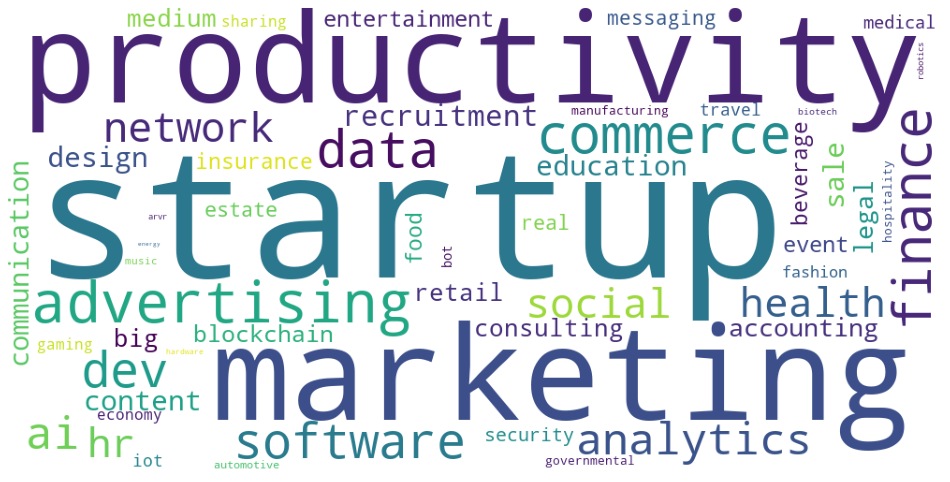

In [166]:
wc = WordCloud(
    background_color = 'white',
    width = 1000,
    height= 500
).generate_from_frequencies(words_dict)

plt.figure(figsize = (13,8))
plt.axis("off")
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.show()

In [167]:
df['product_clean'] = df['products'].apply(preprocess_textdata)

In [168]:
count_vec = CountVectorizer()

count_dtm = count_vec.fit_transform(df['product_clean'])

words = count_vec.get_feature_names()
words_count = count_dtm.sum(axis=0).A1

words_dict = dict(zip(words,words_count))

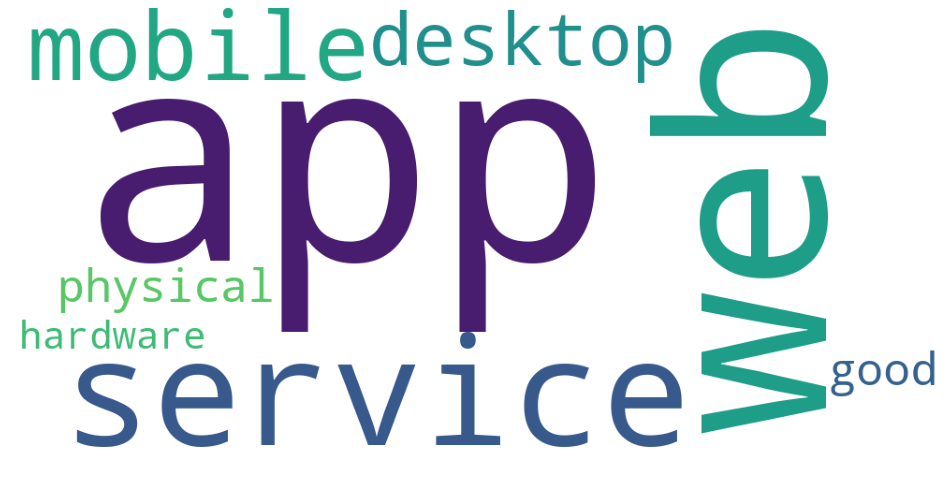

In [169]:
wc = WordCloud(
    background_color = 'white',
    width = 1000,
    height= 500
).generate_from_frequencies(words_dict)

plt.figure(figsize = (13,8))
plt.axis("off")
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.show()

In [170]:
import plotly.express as px

fig = px.bar(df,y='name',x='team_member',orientation='h',title = "Avg Employee Count in a Company")
fig.show()


In [171]:
fig = px.bar(df,y='name',x='ranking',orientation='h',title='Ranking for a Company')
fig.show()

In [172]:
fig = px.histogram(df,"place",title="Count of Cities the companies are based in")
fig.show()

In [173]:
company_types_list1 = [i.split(',') for i in df['market']]

In [174]:
company_types_list1

[["'marketing'", " 'productivity'", " 'social networks'", " 'startups'"],
 ["'design'", " 'education'", " 'software dev'"],
 ["'advertising'", " 'marketing'", " 'startups'", " 'content'"],
 ["'advertising'", " 'e commerce'", " 'media'", " 'content'"],
 ["'security'", " 'blockchain'"],
 ["'communication'", " 'marketing'", " 'startups'", " 'sales'"],
 ["'data'", " 'productivity'", " 'startups'", " 'content'"],
 ["'analytics'", " 'manufacturing'", " 'productivity'", " 'software dev'"],
 ["'productivity'", " 'accounting and legal'", " 'ai'", " 'sales'"],
 ["'software dev'"],
 ["'data'", " 'design'", " 'education'", " 'productivity'"],
 ["'advertising'", " 'marketing'"],
 ["'communication'", " 'medical'"],
 ["'marketing'", " 'startups'"],
 ["'communication'", " 'productivity'", " 'security'"],
 ["'advertising'", " 'design'", " 'marketing'"],
 ["'education'", " 'productivity'", " 'startups'"],
 ["'analytics'", " 'marketing'", " 'social networks'", " 'ai'"],
 ["'startups'", " 'bots'", " 'mess

In [175]:
import itertools

c_list = list(itertools.chain.from_iterable(company_types_list1))

In [176]:
c_list = [i.strip() for i in c_list]

In [177]:
from collections import Counter
c_list_count = Counter(c_list)

In [178]:
c_list_count

Counter({"'accounting and legal'": 36,
         "'advertising'": 93,
         "'ai'": 59,
         "'analytics'": 57,
         "'ar/vr'": 5,
         "'automotive'": 8,
         "'big data'": 33,
         "'biotech'": 6,
         "'blockchain'": 29,
         "'bots'": 11,
         "'communication'": 41,
         "'consulting'": 32,
         "'content'": 43,
         "'data'": 45,
         "'design'": 44,
         "'e commerce'": 84,
         "'education'": 43,
         "'energy'": 2,
         "'entertainment'": 26,
         "'events'": 25,
         "'fashion'": 16,
         "'finance'": 83,
         "'food and beverages'": 22,
         "'gaming'": 15,
         "'governmental'": 10,
         "'hardware'": 4,
         "'health'": 47,
         "'hospitality'": 10,
         "'hr and recruitment'": 47,
         "'insurance'": 22,
         "'iot'": 17,
         "'manufacturing'": 10,
         "'marketing'": 107,
         "'media'": 32,
         "'medical'": 18,
         "'messaging'": 20,
  

In [179]:
c_list_df = pd.DataFrame.from_dict(c_list_count,orient='index').reset_index()
c_list_df.columns = ['company_type','count']
c_list_df

,company_type,count
0,'marketing',107
1,'productivity',100
2,'social networks',50
3,'startups',175
4,'design',44
5,'education',43
6,'software dev',70
7,'advertising',93
8,'content',43
9,'e commerce',84


In [180]:
c_list_df = c_list_df.sort_values(['count'],axis = 0,ascending=False)

In [181]:
c_list_df.reset_index(drop=True,inplace=True)

In [182]:
top_10_ctype = c_list_df[:10]
top_10_ctype

,company_type,count
0,'startups',175
1,'marketing',107
2,'productivity',100
3,'advertising',93
4,'other',86
5,'e commerce',84
6,'finance',83
7,'software dev',70
8,'ai',59
9,'analytics',57


In [183]:
import plotly.express as px

fig = px.bar(top_10_ctype,y='company_type',x='count',orientation='h',title = "Top 10 Company Categories")
fig.show()